<a href="https://colab.research.google.com/github/git-shashank-hp/Structured-ML-Credit-Card-Fraud-Detection-Project/blob/main/Structured_ML_Credit_Card_Fraud_Detection_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to implement proactive monitoring and fraud prevention mechanisms. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and the denial of legitimate transactions.

Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. You can learn more about transactional data and the creation of historical variables from the link attached here. This will be helpful for the capstone project when building the fraud detection model. Based on your understanding of the model, you must analyze the business impact of fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate fraud risks.

---

## Understanding and Defining Fraud

Credit card fraud is any dishonest act or behavior to obtain information without the proper authorization of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card. Apart from this, other ways of making fraudulent transactions include:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Stolen or lost credit cards
- Fraudulent telemarketing

## Data Understanding

This is a simulated data set taken from the Kaggle website and contains both legitimate and fraudulent transactions. You can download the dataset using this [link](#).

The dataset contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from January 1, 2019, to December 31, 2020. It contains a total of **1,852,394 transactions**, out of which **9,651 are fraudulent transactions**. The dataset is highly imbalanced, with the positive class (frauds) accounting for only **0.52%** of the total transactions. Since the dataset is highly imbalanced, it needs to be handled before model building.

The features in the dataset include:

- `amt`: Represents the transaction amount.
- `is_fraud`: A binary label where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.

---


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Project Pipeline




## Step 1 - Load Dataset

### Understanding Data

In this step, I load the data and understand the features present in it. This will help to choose the features that is needed for final model.


In [3]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/CCDP/fraudTrain.csv'

In [4]:
df = pd.read_csv(file_path)

In [ ]:
# Top 5 rows of data

df.head(5)



In [5]:
# To view all columns Present in the dataset

df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## About this File

This dataset contains information about credit card transactions. The primary goal is to build a model to predict fraudulent transactions based on various features. Below are the descriptions of the features in the dataset:

### Features:

- **index**: Unique identifier for each row.
- **trans_date_trans_time**: Date and time of the transaction.
- **cc_num**: Credit card number of the customer.
- **merchant**: Name of the merchant where the transaction occurred.
- **category**: Category of the merchant (e.g., retail, service, etc.).
- **amt**: Amount of the transaction.
- **first**: First name of the credit card holder.
- **last**: Last name of the credit card holder.
- **gender**: Gender of the credit card holder.
- **street**: Street address of the credit card holder.
- **city**: City of the credit card holder.
- **state**: State of the credit card holder.
- **zip**: ZIP code of the credit card holder.
- **lat**: Latitude location of the credit card holder.
- **long**: Longitude location of the credit card holder.
- **city_pop**: Population of the credit card holder's city.
- **job**: Job of the credit card holder.
- **dob**: Date of birth of the credit card holder.
- **trans_num**: Unique transaction number.
- **unix_time**: UNIX timestamp of the transaction.
- **merch_lat**: Latitude location of the merchant.
- **merch_long**: Longitude location of the merchant.
- **is_fraud**: Fraud flag indicating whether the transaction is fraudulent (Target Class).  
  - **1**: Fraudulent transaction.
  - **0**: Legitimate transaction.

---

In [6]:
 # To understand the dataset - with datatypes - null values

 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Discriptive Analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


## Step 2 -  Exploratory Data Analysis (EDA)

In this step, you need to perform **univariate** and **bivariate** analyses of the data, followed by feature transformations, if necessary. EDA helps in understanding the underlying structure and distribution of the data, as well as identifying potential issues like skewness or missing values that can impact model performance.

## Steps in EDA:

### 1. Univariate Analysis
Univariate analysis involves examining the distribution and summary statistics of each feature independently. This helps to understand the characteristics of individual features.

- **Numerical Features**:
  - Check the **mean**, **median**, **standard deviation**, and **range** of continuous variables such as `amt`, `city_pop`, `lat`, `long`, etc.
  - Plot histograms or box plots to visualize the distribution.
  
- **Categorical Features**:
  - Analyze the frequency distribution of categorical variables like `gender`, `category`, `job`, etc.
  - Use bar charts or pie charts to visualize the count of each category.

### 2. Bivariate Analysis
Bivariate analysis involves analyzing the relationships between two variables. This helps to identify correlations, trends, and patterns that could be useful for predictive modeling.

- **Correlation**:
  - Use **correlation matrices** to check how numerical variables are correlated with each other.
  - Visualize using heatmaps to easily identify strong correlations.

- **Fraud vs. Legitimate Transactions**:
  - Analyze how features like `amt`, `city_pop`, `gender`, and `category` vary between fraudulent and legitimate transactions.
  - Visualize the differences using box plots, bar plots, or violin plots, and analyze the distribution for each class of the target variable (`is_fraud`).

### 3. Check for Skewness
### Skewness: What Is It?

**Skewness** is a statistical measure that describes the asymmetry or lopsidedness of the distribution of data. When the data is not symmetrically distributed, it is said to be skewed. Understanding skewness is important because it can affect the performance of certain machine learning models, particularly if the data is heavily skewed and is not properly transformed.

### Types of Skewness:

### 1. Positive Skew (Right Skew):
- The **right tail** (larger values) of the data is longer than the left tail.
- The **mean** is greater than the **median**.
- Most of the data points are clustered towards the **lower values**, with a few high values pulling the mean to the right.
- **Example**: **Income distribution** — Most people earn a lower or average income, with a few people earning very high incomes, causing a long right tail.

### 2. Negative Skew (Left Skew):
- The **left tail** (smaller values) of the data is longer than the right tail.
- The **mean** is less than the **median**.
- Most of the data points are clustered towards the **higher values**, with a few low values pulling the mean to the left.
- **Example**: **Age at retirement** — Most people retire around a certain age, but there are a few cases of very early retirements that create a left tail.

### 3. No Skew (Symmetry):
- A perfectly **symmetric distribution** has no skew. The **mean**, **median**, and **mode** are all equal.
- **Example**: **Height distribution** in a balanced population might be roughly symmetric.

### Why Is Skewness Important?

### 1. Impact on Modeling:
Some machine learning algorithms assume that the data is **normally distributed** (e.g., **Linear Regression**, **Logistic Regression**). If the data is skewed, these models may perform poorly because they are not able to handle such distributions efficiently.

### 2. Skewed Data and Predictions:
- **Skewed data**, especially highly **positive skew**, may lead to overestimation or underestimation of the model’s predictions.
- For instance, in **fraud detection**, if the amount of fraud is highly skewed, the model may be biased toward predicting **non-fraudulent transactions** because they dominate the data.

### Summary:
- **Skewness** measures the **asymmetry** of a distribution.
- **Positive skew** means a long tail on the right, and **negative skew** means a long tail on the left.
- **Highly skewed data** may require **transformations** to improve model performance.

Skewed data can lead to biased model predictions. It's important to check the skewness of the distribution of continuous variables.

- Use **skewness** and **kurtosis** metrics to quantify the skew in the data.
- If features are highly skewed (e.g., transaction amounts), consider applying transformations like **log transformation**, **Box-Cox**, or **Yeo-Johnson** to normalize the data.

### 4. Missing Data and Outliers
- **Missing Data**: Check for missing values in any columns and decide on how to handle them (e.g., imputation, removal).
- **Outliers**: Detect outliers using box plots or Z-scores and decide whether to treat or remove them, depending on their impact.

### 5. Feature Engineering
- **Feature Transformation**: Apply transformations where necessary (e.g., scaling, encoding categorical variables, creating new features like transaction time-based features).
- **Feature Creation**: Create new features from existing ones, such as the **age** of the cardholder from `dob` or the **distance** between cardholder and merchant locations from `lat` and `long`.

### 6. Visualizations
Visualizations help to identify trends, patterns, and anomalies in the data, providing insights that may not be apparent from raw data alone.

- **Histograms and Density Plots** for distribution of numeric variables.
- **Bar Plots** for categorical data.
- **Box Plots** for comparing the distribution of features across different target classes (fraud vs. non-fraud).
- **Pair Plots** or **Scatter Plots** for detecting relationships between numeric features.

---

By performing these analyses, you'll better understand the data, identify potential issues, and prepare it for model building.


In [9]:
# duplicate values in dataset

df.duplicated().sum()


0

### No Duplicate Values in the Dataset

To ensure that the dataset does not contain any duplicate values, we can check for duplicates and remove them if necessary.

If there are duplicate rows, you can use the following code to drop them:

```python
df.drop_duplicates(inplace=True)
```
### Key Points:
- **drop_duplicates()** removes duplicate rows from the DataFrame.
- **inplace=True** ensures the changes are applied directly to the original DataFrame without creating a new one.


### Missing Values

In [10]:
df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


### No Missing Values in the Dataset ✅

The result of `df.isnull().sum()` indicates that there are **no missing values** in the dataset. This is a positive outcome, as missing data is a common issue in real-world datasets, and handling missing values can sometimes be tricky.

Since there are no missing values, we can move forward with other essential steps in data preprocessing:

### Next Steps in Data Preprocessing:

1. **Encoding Categorical Variables** 🔢
   - Convert categorical columns (e.g., `gender`, `state`) into numerical values for use in machine learning models. This can be done using **One-Hot Encoding** or **Label Encoding**.

2. **Scaling Numerical Features** 📏
   - Standardize numerical features, like `amt` (transaction amount), so that they are on the same scale. This is especially important for models that rely on distance-based calculations (e.g., Logistic Regression, k-NN).

3. **Handling Class Imbalance ⚖️**
   - The dataset is likely to be **imbalanced** (with fraudulent transactions being much fewer than legitimate ones). Techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or **undersampling/oversampling** can help balance the classes and improve model performance.




### Handling Missing Values in the Dataset ❓

In real-world datasets, missing values are common. Here are several techniques to handle them based on the nature of the data:

---

#### 1. **Drop Missing Values 🚮**
   - **Description**: Remove rows or columns containing missing values.
   - **When to Use**: Suitable when missing values are minimal and can be safely discarded without affecting the analysis.

   ```python
   df = df.dropna()  # Drop rows with any missing values
   ```
---

#### 2. Imputation (Filling Missing Values) 💡

Imputation replaces missing values with estimates. Below are some common imputation techniques:

---

#### 2.1 **Forward Fill (Propagation) 🔄**
   - **Description**: Fills missing values with the last valid observation.
   - **When to Use**: Ideal for time-series data where previous values are a good estimate for the missing ones.

   ```python
   df['column_name'] = df['column_name'].fillna(method='ffill')
   ```
---

#### 2.2 **Backward Fill (Reverse Propagation) 🔙**
   - **Description**: Fills missing values with the next valid observation.
   - **When to Use**: Similar to forward fill but works well when future data can predict missing values (e.g., when you're predicting future trends or missing values are better filled with subsequent observations).

   ```python
   df['column_name'] = df['column_name'].fillna(method='bfill')
   ```

---

#### 2.3 **Linear Regression Imputation 🔮**
   - **Description**: Predicts missing values using a regression model based on other available features.
   - **When to Use**: Suitable when missing data can be predicted based on relationships with other features in the dataset. For instance, if a feature's missing values are correlated with other features, you can train a regression model to predict those missing values.

   ```python
   from sklearn.linear_model import LinearRegression

   # Initialize the regression model
   model = LinearRegression()

   # Train the model using non-missing data
   model.fit(df[['other_feature']], df['column_name'])

   # Predict missing values using the trained model
   df['column_name'] = model.predict(df[['other_feature']])
   ```

---

#### 2.4 **Mean Value Imputation (Not Recommended) 🛑**
   - **Description**: Replaces missing values with the mean of the column.
   - **When to Use**: Although it can be used as a simple imputation strategy, **mean imputation is not recommended for predictive modeling**. This method can distort the data distribution, reduce variance, and introduce bias, particularly when the data is not normally distributed.

   ```python
   df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
   ```

---

#### 2.5 **Median Value Imputation 🏠**
   - **Description**: Replaces missing values with the median of the column. This method is more robust than mean imputation, especially for skewed data or data with outliers.
   - **When to Use**: Ideal for numerical features that have a skewed distribution or when the data contains outliers. The median is less sensitive to extreme values compared to the mean, making it a better choice when the data is not normally distributed.

   ```python
   df['column_name'] = df['column_name'].fillna(df['column_name'].median())
   ```

---


In [12]:
# Shape of the data set

df.shape

(1296675, 23)

### Shape of the Dataset 🧑‍💻

- **1296675 rows**: This represents the total number of transactions in the dataset.
- **23 columns**: This represents the total number of features (variables) in the dataset, including both numerical and categorical attributes.


In [13]:
# Unique Values in dataset

df.nunique()

,0
Unnamed: 0,1296675
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
first,352
last,481
gender,2
street,983


### Columns to Consider Dropping 🚮

- **index**: This is just a unique identifier for each row and does not provide any useful information for predicting fraud. Can safely drop this column.

- **cc_num**: The credit card number is sensitive information and should not be used for modeling purposes. It doesn’t contribute to fraud detection directly and could lead to privacy issues. Drop this column.

- **first, last**: The first and last name of the cardholder are personally identifiable information (PII) and don't help in detecting fraud. Can drop these columns.

- **street**: The street address provides highly specific information that is unlikely to contribute to fraud detection and can be safely dropped.


- **trans_num**: The transaction number is just a unique identifier for each transaction and doesn’t provide useful information for the model. Can drop this column.

- **unix_time**: The Unix time of a transaction is the number of seconds that have passed since the Unix epoch, which is 00:00:00 Coordinated Universal Time (UTC) on Thursday, January 1, 1970. Can be dropped.


In [14]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Droping the columns

In [15]:
df_cleaned = df.drop(['Unnamed: 0' , 'cc_num', 'first', 'last' , 'trans_num' , 'unix_time' , 'street'] , axis = 1 )

In [16]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
df_cleaned.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Converting `trans_date_trans_time` and `dob` to `datetime` Datatype 🕒  

- **trans_date_trans_time**: Represents the transaction date and time when the credit card transaction occurred.
- **dob**: Represents the date of birth of the cardholder.


In [18]:
df_cleaned['trans_date_trans_time']= pd.to_datetime(df_cleaned['trans_date_trans_time'])
df_cleaned['dob'] = pd.to_datetime(df_cleaned['dob'])

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   zip                    1296675 non-null  int64         
 8   lat                    1296675 non-null  float64       
 9   long                   1296675 non-null  float64       
 10  city_pop               1296675 non-null  int64         
 11  job                    1296675 non-null  object        
 12  dob                    12966

### Extracting Date-Time Components from `trans_date_trans_time` 🕒

You can extract the year, month, day, hour, minute, second, and weekday from the `trans_date_trans_time` column using pandas' `.dt` accessor.

In [31]:
# Extracting individual date-time components from 'trans_date_trans_time'
df_cleaned['year'] = df_cleaned['trans_date_trans_time'].dt.year
df_cleaned['month'] = df_cleaned['trans_date_trans_time'].dt.month
df_cleaned['day'] = df_cleaned['trans_date_trans_time'].dt.day
df_cleaned['hour'] = df_cleaned['trans_date_trans_time'].dt.hour
df_cleaned['minute'] = df_cleaned['trans_date_trans_time'].dt.minute
df_cleaned['second'] = df_cleaned['trans_date_trans_time'].dt.second
df_cleaned['weekday'] = df_cleaned['trans_date_trans_time'].dt.weekday  # 0 = Monday, 6 = Sunday
df_cleaned['is_weekend'] = df_cleaned['trans_date_trans_time'].dt.weekday >= 5  # True if weekend (Saturday or Sunday)

# Extracting individual date-time components from 'dob'
df_cleaned['birth_year'] = df_cleaned['dob'].dt.year
df_cleaned['birth_month'] = df_cleaned['dob'].dt.month
df_cleaned['birth_day'] = df_cleaned['dob'].dt.day

# Calculate age by subtracting birth year from the current year
current_year = pd.to_datetime('today').year
df_cleaned['age'] = current_year - df_cleaned['birth_year']


In [32]:
df_cleaned.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'weekday', 'is_weekend', 'birth_year',
       'birth_month', 'birth_day', 'age'],
      dtype='object')

In [33]:
df_cleaned.head(3)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,...,day,hour,minute,second,weekday,is_weekend,birth_year,birth_month,birth_day,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,1,0,0,18,1,False,1988,3,9,36
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,1,0,0,44,1,False,1978,6,21,46
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,1,0,0,51,1,False,1962,1,19,62


In [34]:
df_cleaned['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int32)

In [35]:
df_cleaned['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [36]:
# Creating a dictionary of months
months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Creating a dictionary for weekdays
weekday_dict = {6: 'Monday', 0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday'}


In [37]:
# Mapping the 'month' column to month names using the months_dict
df_cleaned['month'] = df_cleaned['month'].map(months_dict)


In [38]:
# Get unique values in the 'month' column
df_cleaned['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [40]:
# Mapping the 'weekday' column to weekday names using the dictionary
df_cleaned['weekday'] = df_cleaned['weekday'].map(weekday_dict)


In [41]:
# Get unique values in the 'month' column
df_cleaned['weekday'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [49]:
# Mapping the 'birth_month' column to birth_month names using the months_dict
df_cleaned['birth_month'] = df_cleaned['birth_month'].map(months_dict)


In [51]:
df_cleaned['birth_month'].unique()

array(['March', 'June', 'January', 'August', 'July', 'February',
       'December', 'November', 'May', 'April', 'October', 'September'],
      dtype=object)

In [42]:
df_cleaned.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'weekday', 'is_weekend', 'birth_year',
       'birth_month', 'birth_day', 'age'],
      dtype='object')

In [43]:
# Drop 'trans_date_trans_time', 'dob', 'minute', and 'second' columns
df_cleaned.drop(columns=['trans_date_trans_time', 'dob', 'minute', 'second'], inplace=True)



In [44]:
# Verify that the columns are dropped
df_cleaned.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'birth_year',
       'birth_month', 'birth_day', 'age'],
      dtype='object')

### Checking vales for fraud in the dataset

In [52]:
df_cleaned['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


In [54]:
df_cleaned['is_fraud'].value_counts( normalize=True) * 100


,proportion
is_fraud,
0,99.421135
1,0.578865


### Overview of Fraud Distribution in the Dataset

In the `df_cleaned` dataset, we have a target variable `is_fraud` which indicates whether a transaction is fraudulent or not. The distribution of fraud in the dataset is highly imbalanced.

#### 1. **Count of Fraudulent vs. Non-Fraudulent Transactions**
- **Non-Fraudulent Transactions (0):** 1,289,169
- **Fraudulent Transactions (1):** 7,506

#### 2. **Proportion of Fraudulent vs. Non-Fraudulent Transactions**
- **Non-Fraudulent Transactions (0):** 99.42% of the total transactions
- **Fraudulent Transactions (1):** 0.58% of the total transactions


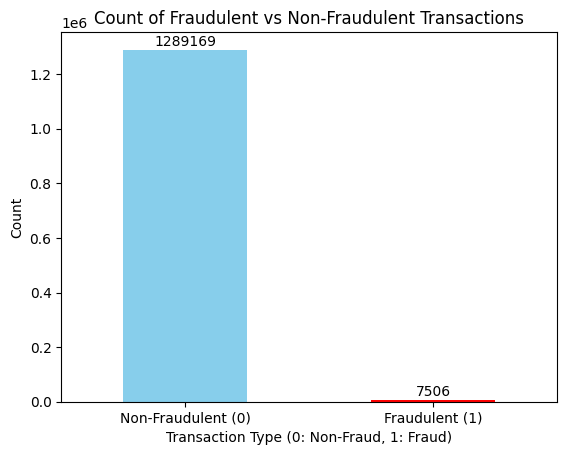

In [59]:
# Count of fraud vs non-fraud
ax = df_cleaned['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'red'])

# Add labels and title
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)

# Add data labels on top of the bars
for i, v in enumerate(df_cleaned['is_fraud'].value_counts()):
    ax.text(i, v + 5000, str(v), ha='center', va='bottom', fontsize=10)  # Adjust position and font size

plt.show()

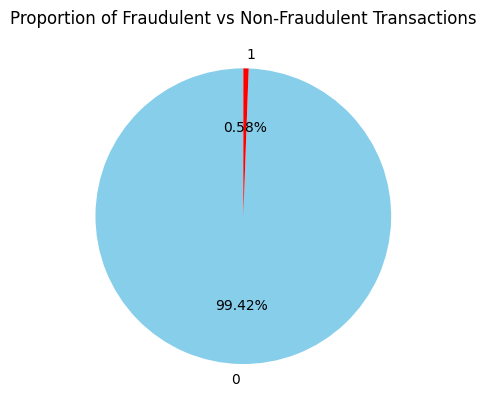

In [60]:
# Proportions of fraud vs non-fraud
df_cleaned['is_fraud'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'red'], startangle=90, legend=False)

# Add title
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.show()
